# Graph algorithms

Graphs are incredibly versatile data structures and due to this versatility they are ubiquitous in computing. A graph $G$ is a set of vertices (nodes) $V$ together with a set of edges $E$ that connect the nodes. So if a graph has two nodes $v_1$ and $v_2$ in it's vertex set then we denote that there is an edge between $v_1$ and $v_2$ by having the element $(v_1,v_2)$ in the edge set $E$. For example for the vertex set $V=\{1,2,3,4\}$ and the edge set $E=\{(1,2), (2,3), (1,3), (2,4)\}$ the graph $G := \{V,E\}$ looks like

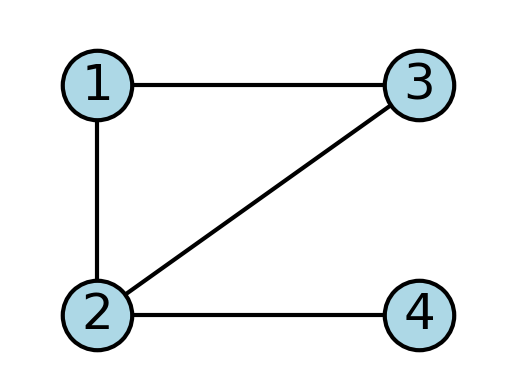

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import sympy as syp

options = {
    "font_size": 36,
    "node_size": 2500,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "font_family": "sans"
}

G = nx.Graph()
V = [1,2,3,4]
E = [(1,2), (2,3), (1,3), (2,4)]
G.add_nodes_from(V)
G.add_edges_from(E)

# explicitly set node positions
pos = {1: (0, 0), 2: (0, -1), 3: (1, 0), 4: (1, -1) }
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

Graphs can also be *direct* meaning the edges point from one node to another for example the edge $(1,2)$ denotes that there is an edge connecting nodes 1 and 2 that points from node 1 to node 2. The graph $G= {V, E}$ where $V=\{1,2,3,4\}$ and $E=\{(1,2), (2,3), (1,3), (2,4)\}$ is shown below.

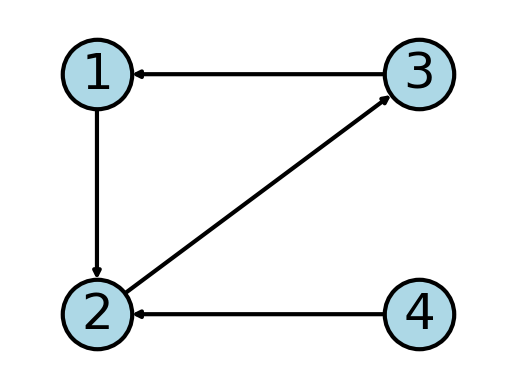

In [41]:
DiG = nx.DiGraph()
V = [1,2,3,4]
E = [(1,2), (2,3), (3,1), (4,2)]
DiG.add_nodes_from(V)
DiG.add_edges_from(E)

nx.draw_networkx(DiG, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

The edges of graphs can also have an attribute associated with it. Most often this attribute is numerical and called the *weight* of an edge.

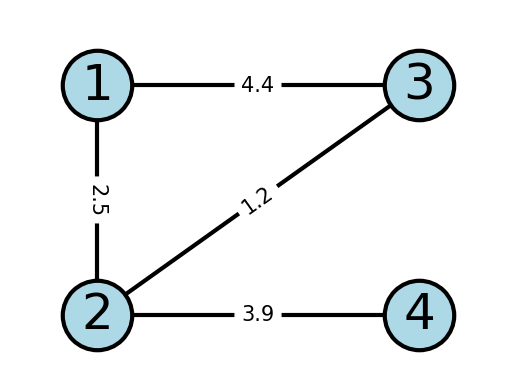

In [27]:
G_weighted = nx.Graph()
V = [1,2,3,4]
E = [(1, 2, {'weight':2.5}), (2, 3, {'weight':1.2}), (1, 3, {'weight':4.4}), (2, 4, {'weight':3.9})]
G_weighted.add_nodes_from(V)
G_weighted.add_edges_from(E)

# explicitly set node positions
# G[i][j] returns edge data of edge (i,j)
pos = {1: (0, 0), 2: (0, -1), 3: (1, 0), 4: (1, -1) }
nx.draw_networkx(G, pos, **options)
nx.draw_networkx_edge_labels(
    G, pos, 
    edge_labels={ E : G_weighted[E[0]][E[1]]['weight']  for E in G_weighted.edges()}, # loop trough edges and make dict { edge: weight }
    font_color='black',
    font_size=15
)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Representing graphs

While representing graphs pictorially is useful for visualization it is not straightforward to work with in code. Thus it is important to have ways of representing graphs that are easier to work with computationally. 

### Adjacency matrix
The first way of represent a graph we will go over is by an adjacency matrix. For a graph with $n$ nodes the adjacency matrix $A$ of an *undirected* graph $G$ is a $n\times n$ matrix where the element $A_{ij}=1$ if there is an edge between node $i$ and $j$ and $0$ if there is no edge. This immediately implies that the adjacency matrix of undirected graphs is symmetric i.e. $A_{ij}=A_{ji}$.

For example the adjacency matrix of the undirected graph shown above is

In [28]:
A = nx.to_numpy_array(G)
syp.Matrix(A)

Matrix([
[1.0, 1.0, 1.0,   0],
[1.0,   0, 1.0, 1.0],
[1.0, 1.0,   0,   0],
[  0, 1.0,   0,   0]])

And the adjacency matrix of the directed graph shown above is

In [29]:
A = nx.to_numpy_array(DiG)
syp.Matrix(A)

Matrix([
[  0, 1.0,   0, 0],
[  0,   0, 1.0, 0],
[1.0,   0,   0, 0],
[  0, 1.0,   0, 0]])

And the adjacency matrix of the weighted undirected graph shown above is

In [30]:
A = nx.to_numpy_array(G_weighted)
syp.Matrix(A)

Matrix([
[  0, 2.5, 4.4,   0],
[2.5,   0, 1.2, 3.9],
[4.4, 1.2,   0,   0],
[  0, 3.9,   0,   0]])

### Adjacency list

The other common way of representing a graph is using an adjacency list.

## Breadth first search (BFS)

In [31]:
adj_lst = {}
for line in nx.generate_adjlist(G):
    nodes = line.split(" ")
    s = nodes[0]
    neighbors = nodes[1:]
    adj_lst[s] = neighbors

print(adj_lst)

{'1': ['2', '3', '1'], '2': ['3', '4'], '3': [], '4': []}


## Depth first search (DFS)

## Max flow

## Practice problems

In [32]:
%load_ext watermark
%watermark -n -u -v -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Aug 03 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

sympy     : 1.12
matplotlib: 3.7.4
networkx  : 3.2.1

